This example shows how ring substitutions are handled.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from IPython.display import HTML
from rdkit import rdBase
rdBase.DisableLog("rdApp.debug")

In [2]:
import pandas as pd
from rdkit.Chem import PandasTools

In [3]:
core = Chem.MolFromSmarts("*1CCCC1")

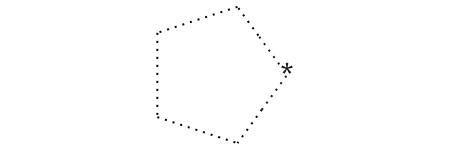

In [4]:
core

In [5]:
smiles = ["C1CCCC1-C2CCC2Cl", "N1CCCC1-C2CCC2Cl", "O1CCCC1-C2CCC2Cl", "N1OCCC1-C2CCC2Cl", "N1OCSC1-C2CCC2Cl"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

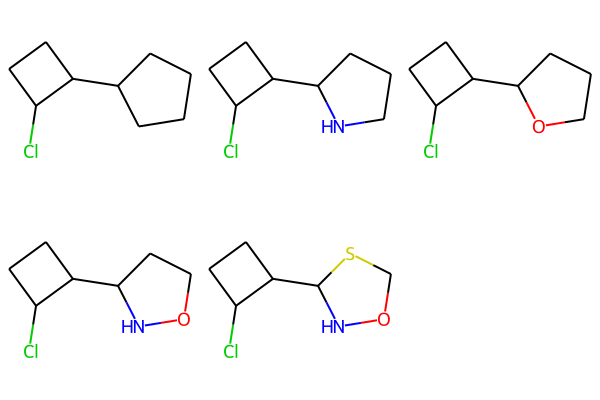

In [6]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

In [7]:
core.GetSubstructMatch(core)

(0, 1, 2, 3, 4)

Make RGroup decomposition!

In [8]:
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)

In [9]:
for i,m in enumerate(mols):
    rgroups.Add(m)
    if i == 10:
        break

We need to call process after all molecules are added to optimize the RGroups.

In [10]:
rgroups.Process()

True

In [11]:
groups = rgroups.GetRGroupsAsColumns()
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)

I would have preferred new cores to appear and the [*:2]-N-[*:2] depiction is a bit annoying...  Perhaps for round 2

,Core,R1,R2
0,,,
1,,,
2,,,

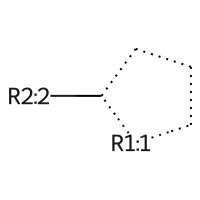
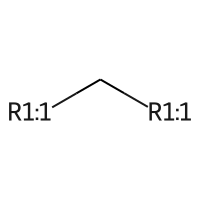
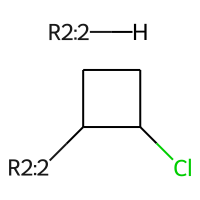
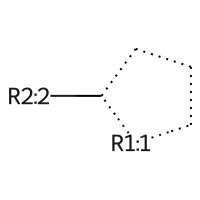
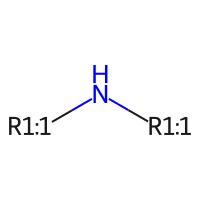
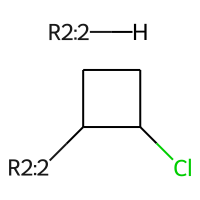
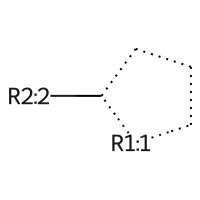
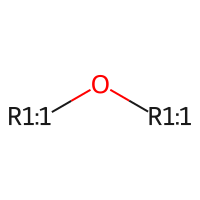
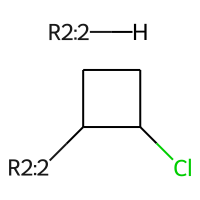

In [12]:
HTML(frame.to_html())